# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

In [2]:
LINK = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv(LINK, sep='\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [5]:
chipo.shape

(4622, 5)

In [6]:
chipo['item_name'].unique().shape

(50,)

In [7]:
# Có 4622 theo dõi trong khi chỉ có 50 sản phẩm theo `item_name` nên sẽ có sản phẩm trùng nhau, vậy cần group lại theo item_name
data = chipo[['quantity', 'item_name']]
group_data = data.groupby(by='item_name').sum()

In [8]:
top5 = group_data.sort_values('quantity', ascending=False).head()
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


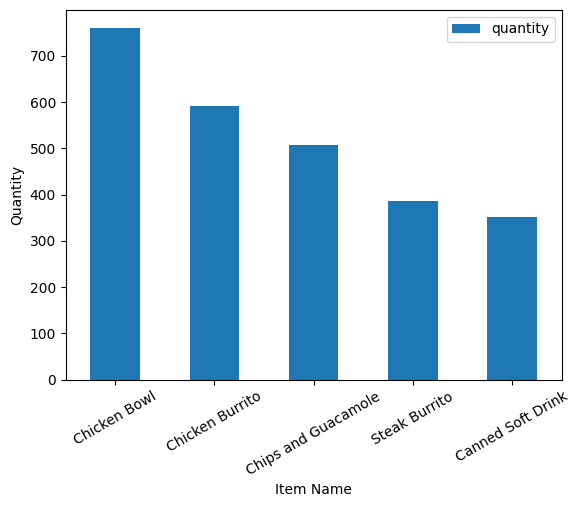

In [9]:
top5.plot(kind='bar', rot=30)
plt.ylabel('Quantity')
plt.xlabel('Item Name')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [10]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [11]:
# Cột item_price có datatype là object nên cần chuyển về dạng float
item_price = chipo['item_price'].str.replace('$', '', regex=True)
chipo_cvt = chipo.copy()
chipo_cvt['float_price'] = pd.to_numeric(item_price)

In [12]:
chipo_cvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   float_price         4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


In [13]:
# get order_id and float_price columns
data = chipo_cvt[['order_id', 'quantity','float_price']]

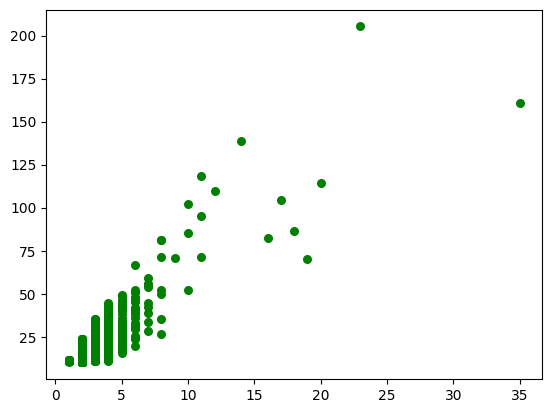

In [14]:
group = data.groupby('order_id').sum()
plt.scatter(x=group['quantity'], y=group['float_price'], s=30, c='green')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [15]:
# Từ Step 5, ta thu được bảng tần suất của 5 món được order nhiều nhất, vậy hãy vẽ ra số tiền thu và vẽ graph
data = chipo_cvt[['quantity', 'item_name', 'float_price']]
group_data = data.groupby(by='item_name').sum()

In [16]:
df = group_data.sort_values('quantity', ascending=False).head()

In [17]:
import seaborn as sns

In [18]:
df

,quantity,float_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43
Canned Soft Drink,351,438.75


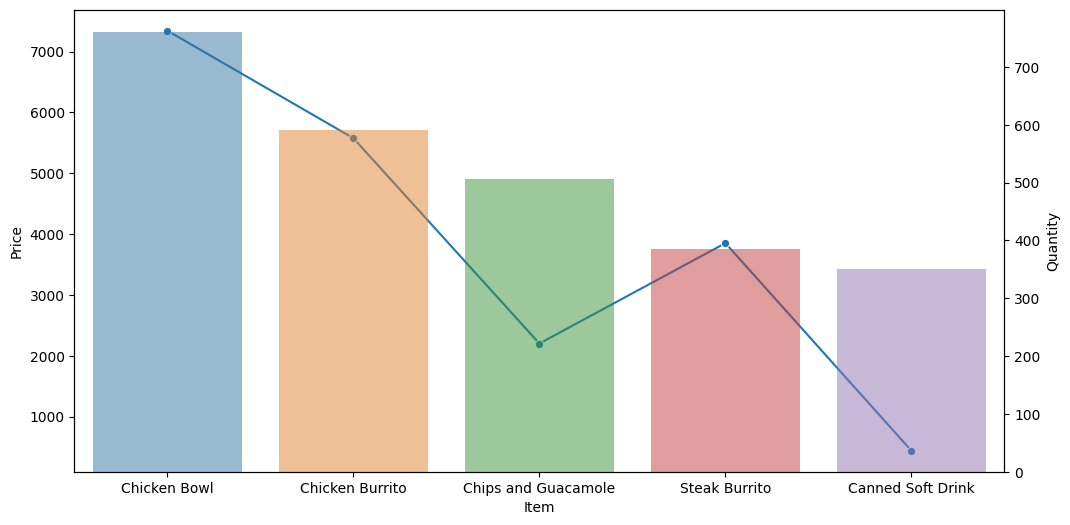

In [19]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df['float_price'], marker='o', sort = False, ax=ax1)
ax1.set(ylabel='Price', xlabel='Item')
ax2 = ax1.twinx()

sns.barplot(data = df, x=df.index, y='quantity', alpha=0.5, ax=ax2)
ax2.set(ylabel='Quantity')
plt.show()

In [20]:
'''
    Mặc dù Chips and Guacamole bán ra nhiều hơn nhưng giá tổng số tiền thu được lại thấp hơn so với Stake Burrito
    Hay như Canned Soft Drink thuộc top 5 nhưng doanh số thu về cũng rất ít
'''

'\n    Mặc dù Chips and Guacamole bán ra nhiều hơn nhưng giá tổng số tiền thu được lại thấp hơn so với Stake Burrito\n    Hay như Canned Soft Drink thuộc top 5 nhưng doanh số thu về cũng rất ít\n'